DATA : Telco Customer Churn from kaggle<br>
GOAL : To predict whether a customer will churn or not depending on the independent variables. <br>
METADATA : 21 Columns with 7043 rows <br>

Dependent variable --> Churn with 0s and 1s <br>
0s indicating No Churn and 1s indicating Churn (26.5% of the data is 1s[churn]). <br>
The data has 15 categorical variables.<br>
There are around 5.1% of missing values <br>
Evaluation Metric: ROC - AUC

The best model I chose is XG Boost based on it's mean cross validation score plus the model performed well on the train and test data.

> Best Model parameters
                                 
- Best model based on cross validation score : XGBoost
 
- Best learning_rate : 0.1
- Best max_depth : 2
- Best min_child_weight : 5
- Best n_estimators : 100
- Best subsample : 0.1


- Best Mean Cross-validation score of XGBoost : 0.85

>  

- Train score of XGBoost Performance - Train:  86.22%

> 

- Test score of XGBoost Performance - Test:  83.01%

NOTE : I have chose roc-auc score to evaluate the classification model. The roc-auc score uses confusion matrix, 
specificity and sensitivity. ROC curves helps us in deciding the best threshold value based on true-positive rate and 
false-positive rate. AUC gives successful classification by logistic model.
ROC is a probability curve and AUC is a measure of separability. If AUC is high, we can say that it is good at 
predicting 0's as 0's and 1's as 1's.


In [350]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
%matplotlib inline
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [57]:
!pip install feature-engine

In [50]:
churn=pd.read_csv('C:/Users/Adithya Arunganesh/Desktop/Machine Learning/Project1/churn.csv')

In [60]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [61]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Calculate the missing values

In [51]:
churn.isnull().sum()

customerID            0
gender               38
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService        105
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling    205
PaymentMethod         0
MonthlyCharges        0
TotalCharges         11
Churn                 0
dtype: int64

In [52]:
miss=churn.isnull().sum()
for key, value in miss.items():
    if value>0:
        print(key, ':',value)

gender : 38
PhoneService : 105
PaperlessBilling : 205
TotalCharges : 11


In [68]:
miss=churn.isnull().sum().sum()
miss_percent=(miss/7043)*100
print("The total percentage of missing value is {:.2f}%" .format(miss_percent))

The total percentage of missing value is 5.10%


Drop ID

In [71]:
churn=churn.drop(columns=['customerID'], axis=1)

In [72]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Variable Types

In [90]:
discrete= [var for var in churn.columns if churn[var].dtype !='O' and len(churn[var].unique()) < 20]

categorical=[var for var in churn.columns if churn[var].dtype =='O' and var not in discrete]

numerical=[var for var in churn.columns if churn[var].dtype != 'O' and var not in discrete and var not in categorical]

In [92]:
print(f"The number of discrete variables are {len(discrete)} and they are :", discrete)
print()
print(f"The number of categorical variables are {len(categorical)} and they are :", categorical)
print()
print(f"The number of numerical variables are {len(numerical)} and they are :", numerical)

The number of discrete variables are 2 and they are : ['SeniorCitizen', 'Churn']

The number of categorical variables are 15 and they are : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

The number of numerical variables are 3 and they are : ['tenure', 'MonthlyCharges', 'TotalCharges']


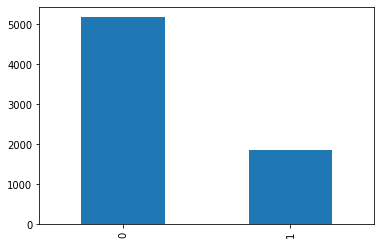

In [95]:
churn['Churn'].value_counts().plot.bar()

# 0--No Churn
# 1--Churn

In [96]:
for var in categorical:
    print(var, churn[var].unique(), '\n')

gender ['Female' 'Male' nan] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

PhoneService ['No' 'Yes' nan] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No' nan] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



In [97]:
for var in discrete:
    print(var, churn[var].unique(), '\n')

SeniorCitizen [0 1] 

Churn [0 1] 



In [98]:
for var in numerical:
    print(var, churn[var].unique(), '\n')

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 



Visualization

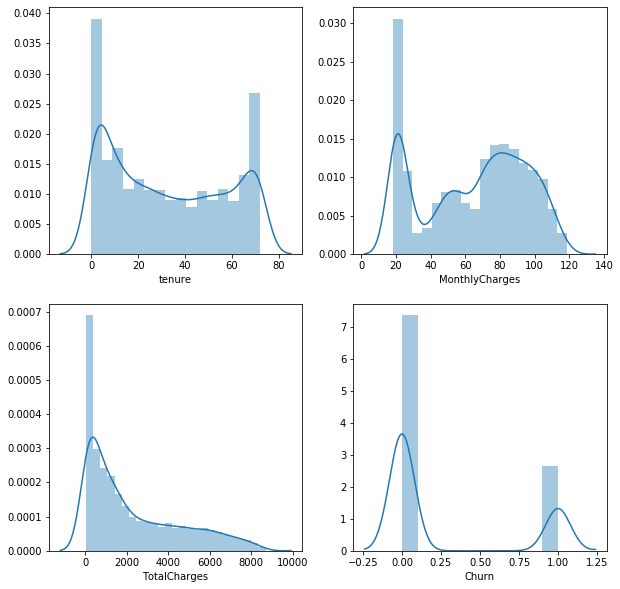

In [114]:
# Plot for continuous variables 
import seaborn as sns

fig, axs=plt.subplots(ncols=2, nrows=2, figsize=(10,10))
axs=axs.flatten()

for i, var in enumerate(numerical+['Churn']):
    sns.distplot(churn[churn[var].notnull()][var], ax=axs[i]);

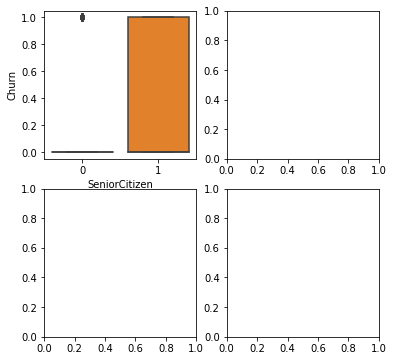

In [121]:
#Plotting outliers

fig, axs=plt.subplots(ncols=2, nrows=2, figsize=(6,6))
axs=axs.flatten()

for i, var in enumerate(discrete):
    if var != 'Churn':
        sns.boxplot(x=var, y='Churn', data=churn, ax=axs[i]);
        
    

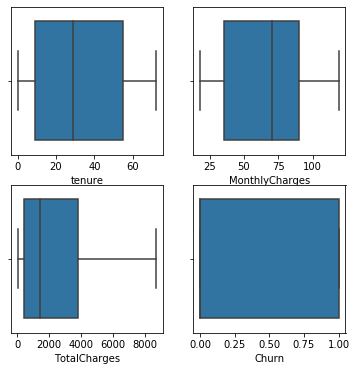

In [124]:
fig, axs=plt.subplots(ncols=2, nrows=2, figsize=(6,6))
axs=axs.flatten()

for i, var in enumerate(numerical+['Churn']):
    sns.boxplot(churn[churn[var].notnull()][var], ax=axs[i]);

Data Split

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(churn.drop('Churn', axis=1), churn['Churn'], test_size=0.2, random_state=0 )

In [160]:
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

In [161]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2920,Female,0,Yes,No,72,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,85.10,6155.40
2966,Female,1,No,No,14,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,46.35,672.70
6099,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1810.55
5482,Male,0,Yes,Yes,33,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,73.90,2405.05
2012,Female,0,Yes,No,47,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,98.75,4533.70


In [162]:
y_train.shape, y_test.shape

((5634,), (1409,))

Feature Engineering

In [163]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from feature_engine.variable_transformers import YeoJohnsonTransformer

For categorical imputation, used most frequeunt values for missing data.
For numerical imputation, used median value to fill up the missing data.

For categorical data, used OneHotCategoricalEncoder to convert into numerical value.
For numerical data, used YeoJohnsonTransformer.

And lastly used scaling for all the data types, numerical, discrete, categorical.

In [164]:
churn_pipe= Pipeline([
                        
    ('categorical_imputation_freq',
     mdi.CategoricalVariableImputer(imputation_method='frequent', variables=['gender', 'PhoneService', 'PaperlessBilling'])),
    
    ('numerical_imputaion_median',
     mdi.MeanMedianImputer(imputation_method='median', variables=['TotalCharges'])),
    
    ('categorical_encode',
     OneHotCategoricalEncoder(top_categories=None, variables=categorical)),
    
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
     
    ('yjt', YeoJohnsonTransformer(variables = numerical))     

])

In [165]:
churn_pipe.fit(X_train, y_train)

Pipeline(steps=[('categorical_imputation_freq',
                 CategoricalVariableImputer(imputation_method='frequent',
                                            variables=['gender', 'PhoneService',
                                                       'PaperlessBilling'])),
                ('numerical_imputaion_median',
                 MeanMedianImputer(variables=['TotalCharges'])),
                ('categorical_encode',
                 OneHotCategoricalEncoder(variables=['gender', 'Partner',
                                                     'Dependents',
                                                     'PhoneService',
                                                     'Multipl...
                                                      'OnlineSecurity_No '
                                                      'internet service',
                                                      'OnlineBackup_Yes',
                                                      'OnlineBackup_No

In [166]:
#Apply transformation

X_train=churn_pipe.transform(X_train)
X_test=churn_pipe.transform(X_test)

In [167]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,...,StreamingMovies_No,Contract_Two year,Contract_Month-to-month,Contract_One year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Mailed check,PaymentMethod_Electronic check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic)
2920,-0.439763,1.381603,0.725501,0.990161,1.007125,-1.007125,1.032476,-1.032476,0.653215,-0.653215,...,-0.806689,1.793618,-1.111228,-0.516093,1.251229,-1.251229,1.822238,-0.712196,-0.531228,-0.518574
2966,2.273954,-0.816282,-0.575289,-0.966933,1.007125,-1.007125,-0.968546,0.968546,0.653215,-0.653215,...,-0.806689,-0.557532,0.899905,-0.516093,-0.799214,0.799214,-0.548776,1.404108,-0.531228,-0.518574
6099,-0.439763,1.350534,-1.179875,-0.231889,1.007125,-1.007125,1.032476,-1.032476,-1.530889,1.530889,...,-0.806689,1.793618,-1.111228,-0.516093,1.251229,-1.251229,-0.548776,-0.712196,1.882432,-0.518574
5482,-0.439763,0.025250,0.312613,0.050964,-0.992925,0.992925,1.032476,-1.032476,-1.530889,1.530889,...,-0.806689,-0.557532,-1.111228,1.937635,-0.799214,0.799214,1.822238,-0.712196,-0.531228,-0.518574
2012,-0.439763,0.554550,1.261825,0.685937,1.007125,-1.007125,1.032476,-1.032476,0.653215,-0.653215,...,1.239635,-0.557532,0.899905,-0.516093,-0.799214,0.799214,-0.548776,1.404108,-0.531228,-0.518574


Dummy Classifier

In [168]:
#Navie Model

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [209]:
dummy = DummyClassifier(strategy='stratified')#most_frequent')
dummy.fit(X_train, y_train)

dummy_cv_score = cross_val_score(dummy, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {:.2f}".format(dummy_cv_score.mean()))
print()

# Check performance
print("Naive Algorithm Train Performance: {:.2f}%" .format(dummy.score(X_train,y_train)*100))
print("Naive Algorithm Test Performance: {:.2f}%" .format(dummy.score(X_test,y_test)*100))


Mean Cross-validation scores: 0.61

Naive Algorithm Train Performance: 60.12%
Naive Algorithm Test Performance: 61.60%


Cost Sensitive Algorithms

1. Logistic Regression

In [251]:
#COST SENSITIVE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(solver='lbfgs')

log_param={'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

log_grid=GridSearchCV(log, log_param, cv=5, n_jobs=2, scoring='roc_auc')
log_grid.fit(X_train, y_train)


# Mean Cross validation Score
print("Mean Cross-validation scores: {:.3f}".format(log_grid.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', log_grid.best_params_)

# Check performance
print("Logistic Regression Train Performance: {:.2f}% " .format(log_grid.score(X_train,y_train)*100))
print("Logistic Regression Test Performance: {:.2f}% " .format(log_grid.score(X_test,y_test)*100))


Mean Cross-validation scores: 0.849

Decision Tree parameters:  {'class_weight': {0: 1, 1: 1}}
Logistic Regression Train Performance: 85.25% 
Logistic Regression Test Performance: 82.67% 


2. Decision Tree

In [290]:
#COST SENSITIVE

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

tree = DecisionTreeClassifier()

tree_param = {'criterion': ['gini', 'entropy'],
           'max_depth': range(1,50)}

tree_grid = GridSearchCV(tree, tree_param, cv=4, n_jobs=2, scoring = 'roc_auc')
tree_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(tree_grid.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', tree_grid.best_params_)

# Check performance
print("Decision Tree Train Performance: {:.2f}% " .format(tree_grid.score(X_train,y_train)*100))
print("Decision Tree Test Performance: {:.2f}% " .format(tree_grid.score(X_test,y_test)*100))

Best Mean Cross-validation score: 0.83

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 4}
Decision Tree Train Performance: 84.47% 
Decision Tree Test Performance: 80.85% 


3. SVM

In [267]:
#COST SENSITIVE

svm_param = {
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}],
}
#apply grid search
svm_grid= GridSearchCV(svm.SVC(), svm_param, cv=5, n_jobs=2, scoring='roc_auc')
svm_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svm_rbf_grid.best_score_))

#find best parameters
print("Best parameters: {}".format(svm_grid.best_params_))

# Check performance
print('Train score is : {:.2f}%' .format(svm_grid.score(X_train,y_train)*100))
print('Test score is : {:.2f}%' .format(svm_grid.score(X_test,y_test)*100))

Best Mean Cross-validation score: 0.80
Best parameters: {'class_weight': {0: 1, 1: 1}}
Train score is : 87.34%
Test score is : 78.05%


 4. Cost Sensitive Random Forest 
- class_weight='balanced' - weights are based on complete training data 
- class_weight = 'balanced_subsample' - weight are based on proportions in the bootstrapped sample

In [288]:
#COST SENSITIVE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

forest=RandomForestClassifier(n_estimators=100, class_weight='balanced')

forest_param={ 
    'n_estimators': [200,400,600],
    'max_features': ['sqrt'],
    'max_depth' : [5,10,15],
    'criterion' :['gini', 'entropy']}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

forest_grid = GridSearchCV(forest, forest_param, cv=5, n_jobs=-1, scoring='roc_auc')
forest_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(forest_grid.best_score_))
print()

#find best parameters
print('Random Forest parameters: ', forest_grid.best_params_)

# Check performance
print("Random Forest Train Performance: {:.2f}% ".format(forest_grid.score(X_train,y_train)*100))
print("Random Forest Test Performance: {:.2f}% " .format(forest_grid.score(X_test,y_test)*100))

Best Mean Cross-validation score: 0.85

Random Forest parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 600}
Random Forest Train Performance: 86.08% 
Random Forest Test Performance: 82.97% 


In [289]:
#COST SENSITIVE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

forest=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

forest_param={ 
    'n_estimators': [200,400,600],
    'max_features': ['sqrt'],
    'max_depth' : [5,10,15],
    'criterion' :['gini', 'entropy']}

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

forest_grid = GridSearchCV(forest, forest_param, cv=5, n_jobs=-1, scoring='roc_auc')
forest_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(forest_grid.best_score_))
print()

#find best parameters
print('Random Forest parameters: ', forest_grid.best_params_)

# Check performance
print("Random Forest Train Performance: {:.2f}% ".format(forest_grid.score(X_train,y_train)*100))
print("Random Forest Test Performance: {:.2f}% " .format(forest_grid.score(X_test,y_test)*100))

Best Mean Cross-validation score: 0.85

Random Forest parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 400}
Random Forest Train Performance: 86.02% 
Random Forest Test Performance: 82.84% 


5. XG Boost

In [227]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [228]:
from xgboost import XGBClassifier

In [291]:
#COST SENSITIVE
xgboost = XGBClassifier()

xgb_param = { 'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [1,0.1,0.01],
               'min_child_weight' : [3,5,7],
                'subsample':[1,0.1,0.01]}


#apply grid search
xgb_grid = GridSearchCV(xgboost, xgb_param, cv=5, n_jobs=2, scoring='roc_auc')
xgb_grid.fit(X_train, y_train)

print("Best parameters: {}".format(xgb_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(xgb_grid.best_score_))

# Check performance
print("XG Boost Classifier Train Performance: {:.2f}% ".format(xgb_grid.score(X_train,y_train)*100))
print("XG Boost Classifier Test Performance: {:.2f}% " .format(xgb_grid.score(X_test,y_test)*100))

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.1}
Best Mean cross-validation score: 0.85
XG Boost Classifier Train Performance: 86.22% 
XG Boost Classifier Test Performance: 83.01% 


6. Extra TRee

In [237]:
#EXTRA TREE
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(random_state=42)

et_param = {'n_estimators': [200, 500, 750],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy']}

et_grid = GridSearchCV(et, et_param, cv=5, return_train_score=True, scoring = 'roc_auc')
et_grid.fit(X_train, y_train)


# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(et_grid.best_score_))
print()

#find best parameters
print('Extra Tree Classifier parameters: ', et_grid.best_params_)

# Check performance
print("Extra Tree Classifier Train Performance: {:.2f}% ".format(et_grid.score(X_train,y_train)*100))
print("Extra Tree Classifier Test Performance: {:.2f}% " .format(et_grid.score(X_test,y_test)*100))

Best Mean Cross-validation score: 0.84

Extra Tree Classifier parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Extra Tree Classifier Train Performance: 87.40% 
Extra Tree Classifier Test Performance: 82.89% 


7.	Bagging decision tree with under sampling

In [239]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [240]:
from imblearn.ensemble import BalancedBaggingClassifier

In [241]:
#BAGGING DECISION TREE UNDER SAMPLING
bag_tree=BalancedBaggingClassifier()

cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

bag_scores = cross_val_score(bag_tree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.2f' % bag_scores.mean())

Mean ROC AUC: 0.81


In [342]:
#TOP 5 ESTIMATORS

estimators1_ = [('log',log_grid.best_estimator_),
               ('xgb',xgb_grid.best_estimator_),
               ('svm',svm_grid.best_estimator_),
               ('extra tree',et_grid.best_estimator_),
               ('decision tree',tree_grid.best_estimator_),
               ('forest',forest_grid.best_estimator_)]


In [343]:
#STACKING CLASSIFIER

from sklearn.ensemble import StackingClassifier

stack1 = StackingClassifier(estimators= estimators1_
                            , final_estimator=LogisticRegression())
stack1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
stack1_grid = GridSearchCV(stack1, stack1_param, cv=5, return_train_score=True, scoring='roc_auc' )
stack1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {stack1_grid.best_score_}')
print(f'Best parameters are {stack1_grid.best_params_}')
print('Train score is:{:.2f}%' .format(stack1_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%' .format(stack1_grid.score(X_test,y_test)*100))

Best Mean Cross Validation Score is 0.8532978809878472
Best parameters are {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is:86.17%
Test score is: 83.24%


# Data Sampling 

In [297]:
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline

In [298]:
#LOGISTIC REGRESSION

log_o_pipe = Pipeline([('adasyn',ADASYN()),('lg',LogisticRegression())])
log_o_param = {'adasyn__n_neighbors': [1,2,3,4,5]}

log_o_grid= GridSearchCV(log_o_pipe, log_o_param, cv=5, n_jobs=2, scoring='roc_auc')
log_o_grid.fit(X_train, y_train)

print("Best parameters: {}".format(log_o_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(log_o_grid.best_score_))
print('Train score is: {:.2f}%' .format(log_o_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%' .format(log_o_grid.score(X_test,y_test)*100))

Best parameters: {'adasyn__n_neighbors': 5}
Best Mean cross-validation score: 0.85
Train score is: 85.14%
Test score is: 82.70%


In [308]:
#DECISION TREE

tree_o_pipe = Pipeline([('adasyn',ADASYN()),('dtree',DecisionTreeClassifier(max_depth=5))])
tree_o_param = {'adasyn__n_neighbors': [5,10,50]}

tree_o_grid= GridSearchCV(tree_o_pipe, tree_o_param, cv=5,  scoring='roc_auc')
tree_o_grid.fit(X_train, y_train)

print("Best parameters: {}".format(tree_o_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(tree_o_grid.best_score_))
print('Train score is: {:.2f}%' .format(tree_o_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%' .format(tree_o_grid.score(X_test,y_test)*100))

Best parameters: {'adasyn__n_neighbors': 10}
Best Mean cross-validation score: 0.82
Train score is: 83.55%
Test score is: 81.37%


In [340]:
#RANDOM FOREST

rf_o_pipe = Pipeline([('adasyn',ADASYN()),('rf',RandomForestClassifier(n_estimators=200,criterion='entropy',
                                                                       max_features='auto'))])
rf_o_param = {'adasyn__n_neighbors': [2,4,5],
                'rf__max_depth' : [5,10,20]}

rf_o_grid= GridSearchCV(rf_o_pipe, rf_o_param, cv=5, n_jobs=2, scoring='roc_auc')
rf_o_grid.fit(X_train, y_train)

print("Best parameters: {}".format(rf_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(rf_grid.best_score_))
print('Train score is: {:.2f}%'.format(rf_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%' .format(rf_grid.score(X_test,y_test)*100))

Best parameters: {'adasyn__n_neighbors': 2, 'rf__max_depth': 5}
Best Mean cross-validation score: 0.85
Train score is: 85.76%
Test score is: 82.71%


In [326]:
#KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier

knn_o_pipe = Pipeline([('adasyn',ADASYN()),('knn',KNeighborsClassifier(n_neighbors=12))])
knn_o_param = {'adasyn__n_neighbors': [5,10,20,50]}

knn_o_grid= GridSearchCV(knn_o_pipe, knn_o_param, cv=5, n_jobs=2, scoring='roc_auc')
knn_o_grid.fit(X_train, y_train)

print("Best parameters: {}".format(knn_o_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(knn_o_grid.best_score_))
print('Train score is: {:.2f}%'.format(knn_o_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%'.format(knn_o_grid.score(X_test,y_test)*100))

Best parameters: {'adasyn__n_neighbors': 50}
Best Mean cross-validation score: 0.79
Train score is: 88.56%
Test score is: 77.77%


In [325]:
#SVM - SIGMOID

svm_o_pipe = Pipeline([('adasyn',ADASYN()),('svm',svm.SVC(C=0.01,gamma=0.01,kernel='sigmoid'))])
svm_o_param = {'adasyn__n_neighbors': [1,2,3,4,5]}

svm_o_grid= GridSearchCV(svm_o_pipe, svm_o_param, cv=5, n_jobs=2, scoring='roc_auc')
svm_o_grid.fit(X_train, y_train)

print("Best parameters: {}".format(svm_o_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(svm_o_grid.best_score_))
print('Train score is: {:.2f}%'.format(svm_o_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%'.format(svm_o_grid.score(X_test,y_test)*100))

Best parameters: {'adasyn__n_neighbors': 1}
Best Mean cross-validation score: 0.84
Train score is: 84.13%
Test score is: 81.81%


In [329]:
#EASY ENSEMBLE CLASSIFIER

from imblearn.ensemble import EasyEnsembleClassifier
easy_o_pipe = Pipeline([('adasyn',ADASYN()),('ee',EasyEnsembleClassifier())])
easy_o_param = {'adasyn__n_neighbors': [1,2,3,4,5]}

easy_o_grid= GridSearchCV(easy_o_pipe, easy_o_param, cv=5, n_jobs=2, scoring='roc_auc')
easy_o_grid.fit(X_train, y_train)

print("Best parameters: {}".format(easy_o_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(easy_o_grid.best_score_))
print('Train score is: {:.2f}%'.format(easy_o_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%'.format(easy_o_grid.score(X_test,y_test)*100))

Best parameters: {'adasyn__n_neighbors': 3}
Best Mean cross-validation score: 0.85
Train score is: 85.68%
Test score is: 83.14%


In [338]:
#XGBOOST
from  xgboost import XGBClassifier

xgb_u= XGBClassifier(random_state=42, early_stopping_rounds=2, n_estimators=50, objective ='binary:logistic',
                                                                        max_depth = 3)
 
    
xgb_u_pipe = Pipeline([('adasyn',ADASYN()),('xgb',xgb_u)])
xgb_u_param = {
    
                 'adasyn__n_neighbors': [2,4,5],
                 'xgb__learning_rate' : [0.1,0.01,1] }


xgb_u_grid = GridSearchCV(xgb_u, xgb_u_param, cv=5, return_train_score=True, scoring= 'roc_auc' )
xgb_u_grid.fit(X_train,y_train)

print("Best parameters: {}".format(xgb_u_grid.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(xgb_u_grid.best_score_))
print('Train score is: {:.2f}%'.format(xgb_u_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%'.format(xgb_u_grid.score(X_test,y_test)*100))

[20:27:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas

[20:27:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas

[20:27:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas

In [347]:
#TOP 5 ESTIMATORS

estimators2_ = [('decision tree',tree_o_grid.best_estimator_),('svm',svm_o_grid.best_estimator_),
              ('ranfom forest',rf_o_grid.best_estimator_),('easy ensemble',easy_o_grid.best_estimator_),
               ('XGB',xgb_u_grid.best_estimator_)]

In [352]:
#STACKING CLASSIFIER

from sklearn.ensemble import StackingClassifier

stack2 = StackingClassifier(estimators= estimators2_,  final_estimator=LogisticRegression())

stack2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }

stack2_grid = GridSearchCV(stack2, stack2_param,cv=5, return_train_score=True,scoring='roc_auc' )
stack2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {stack2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {stack2_grid.best_params_}')
print('Train score is: {:.2f}%'.format(stack2_grid.score(X_train,y_train)*100))
print('Test score is: {:.2f}%'.format(stack2_grid.score(X_test,y_test)*100))

[13:13:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:14:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas

[13:16:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:16:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas

[13:19:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:19:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:19:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas

[13:21:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:21:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adasyn__n_neighbors, early_stopping_rounds, xgb__learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:22:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { adas